In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [5]:
def lorenz(x, t, F):
    '''Partial derivatives for Lorenz-96 ODE.'''
    p = len(x)
    dxdt = np.zeros(p)
    for i in range(p):
        dxdt[i] = (x[(i+1) % p] - x[(i-2) % p]) * x[(i-1) % p] - x[i] + F

    return dxdt

In [2]:
def simulate_lorenz_96(p, T, F=10.0, delta_t=0.1, sd=0.1, burn_in=1000,
                       seed=0):
    if seed is not None:
        np.random.seed(seed)

    # Use scipy to solve ODE.
    x0 = np.random.normal(scale=0.01, size=p)
    t = np.linspace(0, (T + burn_in) * delta_t, T + burn_in)
    X = odeint(lorenz, x0, t, args=(F,))
    X += np.random.normal(scale=sd, size=(T + burn_in, p))

    # Set up Granger causality ground truth.
    GC = np.zeros((p, p), dtype=int)
    for i in range(p):
        GC[i, i] = 1
        GC[i, (i + 1) % p] = 1
        GC[i, (i - 1) % p] = 1
        GC[i, (i - 2) % p] = 1

    return X[burn_in:], GC


In [44]:
p = 10
T = 1000
dt = 2
F = 2.5
delta_t=0.1
sd=0.1
burn_in=100
seed=0
np.random.seed(seed)
x0 = np.random.normal(scale=0.01, size=p)
t = np.linspace(0, (dt + burn_in) * delta_t, dt + burn_in)
X_np = np.zeros([T,p])

In [45]:
X_np[0] = x0
for i in range(1,T):
    x = X_np[i-1]
    for j in range(p):
        X_np[i][j] = delta_t * (x[(j + 1) % p] - x[(j - 2) % p]) * x[(j - 1) % p] + (1 - delta_t) * x[j % p] + delta_t * F

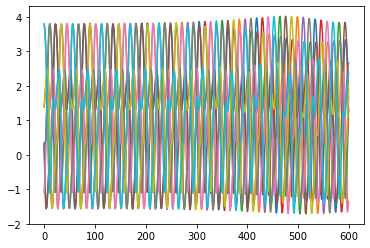

In [46]:
plt.plot(X_np[400:2000])

E:\Users\Administrator\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


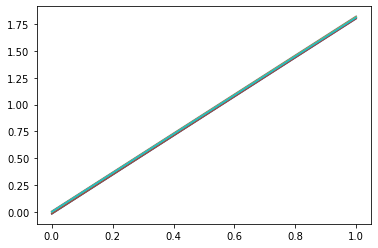

In [45]:
X = odeint(lorenz, x0, t, args=(F,))
plt.plot(X)
X_np[0] = X[-1]
delta_t = np.linspace(0.1,1.9,T)
for i in range(1,T):
    t = np.linspace(0, (dt) * delta_t[i], dt)
    X_np[i] = odeint(lorenz, X_np[i-1], t, args=(F,))[-1]

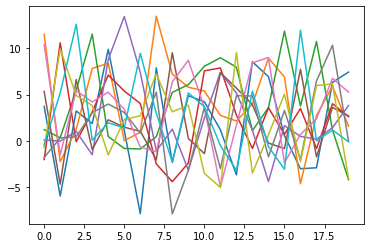

In [48]:
plt.plot(X_np[490:510])

array([0.1       , 0.1018018 , 0.1036036 , 0.10540541, 0.10720721,
       0.10900901, 0.11081081, 0.11261261, 0.11441441, 0.11621622,
       0.11801802, 0.11981982, 0.12162162, 0.12342342, 0.12522523,
       0.12702703, 0.12882883, 0.13063063, 0.13243243, 0.13423423,
       0.13603604, 0.13783784, 0.13963964, 0.14144144, 0.14324324,
       0.14504505, 0.14684685, 0.14864865, 0.15045045, 0.15225225,
       0.15405405, 0.15585586, 0.15765766, 0.15945946, 0.16126126,
       0.16306306, 0.16486486, 0.16666667, 0.16846847, 0.17027027,
       0.17207207, 0.17387387, 0.17567568, 0.17747748, 0.17927928,
       0.18108108, 0.18288288, 0.18468468, 0.18648649, 0.18828829,
       0.19009009, 0.19189189, 0.19369369, 0.1954955 , 0.1972973 ,
       0.1990991 , 0.2009009 , 0.2027027 , 0.2045045 , 0.20630631,
       0.20810811, 0.20990991, 0.21171171, 0.21351351, 0.21531532,
       0.21711712, 0.21891892, 0.22072072, 0.22252252, 0.22432432,
       0.22612613, 0.22792793, 0.22972973, 0.23153153, 0.23333